# Modelling for Initial Modeling

## Introduction

This Notebook is develped to identify and specify the models, which will be used to apply the Active Learning strategies on. At least two models will be created, as described in the initial Research Proposal: 
1. PLS-Regression-Model 
2. Random-Forest-Regression-Model

## Preperation

To work in python, various libraries are needed. So the neccessary libraries are imported in the next cell. 

The code is developed inspired by the machine learining course by [Peter Sykacek](peter.sykacek[at]boku.ac.at) in the winter of 2023.


In [1]:
## we run locally and basepath is this directory 
basepath="./"
### ml_lib.py resides in <basepath>/course.lib and contains course relevant
### library functions. To allow loading it we set a temporary path to
### the directory
import sys  
sys.path.append(basepath+"server_files/ml_group/course.lib")

### Imports

In [2]:
sys.path
import ml_lib as mlib
##########################################################
# Step 1:
# Regression with sklearn.
#
# import numpy, and plotting
import numpy as np
import matplotlib.pyplot as plt

### turn off convergence warnings

In [3]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import os
os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesses

## Data Import



## Import Model functions

To generate various models an import of the respective functions from preexisting packages is neccessary. 

### Gridsearch Crossvalidation

[sklearn GSCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

Exhaustive search over specified parameter values for an estimator.
Important members are fit, predict.

* GridSearchCV implements a "fit" and a "score" method.
* It also implements "score_samples", "predict", "predict_proba", "decision_function", "transform" and "inverse_transform" if they are implemented in the estimator used.

In [4]:
from sklearn.model_selection import GridSearchCV as GSCV

### K-Fold cross-validator.
[sklearn KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)

Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).

Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [5]:
from sklearn.model_selection import KFold

### Kernel Ridge

[sklearn KRR](https://scikit-learn.org/stable/modules/kernel_ridge.html#kernel-ridge-regression)

Kernel ridge regression (KRR) [M2012] combines Ridge regression and classification (linear least squares with l2-norm regularization) with the kernel trick. It thus learns a linear function in the space induced by the respective kernel and the data. For non-linear kernels, this corresponds to a non-linear function in the original space.

In [6]:
from sklearn.kernel_ridge import KernelRidge as KRR

## Data Import

In this section the sample data will be imported. 

Currently 2 Datasets are of interest for us: 
1. PS20191107_gegl.csv
2. dps1200.csv

The differences are that the first is a dataframe containing the data unmodified and full. It was used to generate the later, which contains only selected sections of the spectra. These are (under my current knowledge)

### PS20191107 (Full Data)

In [8]:
import pandas as pd
data_full = pd.read_csv(basepath+"data/PS20191107_gegl.csv", 
                            sep=";", decimal=",", encoding="utf-8")
print(data_full.head())

     Unnamed: 0  year Origin    type      3996      3994      3992      3990  \
0  2GOS-18_1955  1955    POL  living  0.016119  0.015972  0.015830  0.015728   
1  2GOS-18_1969  1969    POL  living  0.016368  0.016543  0.016663  0.016569   
2  2GOS-18_1974  1974    POL  living  0.021364  0.021662  0.021862  0.021573   
3  2GOS-18_1976  1976    POL  living  0.019351  0.019246  0.019181  0.018998   
4  2GOS-18_1996  1996    POL  living  0.018548  0.018604  0.018670  0.018616   

       3988      3987  ...       417       415       413       411       409  \
0  0.015734  0.015787  ... -0.027973 -0.028180 -0.028389 -0.028595 -0.029011   
1  0.016333  0.016217  ... -0.029520 -0.029747 -0.029978 -0.030204 -0.030087   
2  0.020925  0.020585  ... -0.031046 -0.031270 -0.031483 -0.031701 -0.032089   
3  0.018926  0.019205  ... -0.029852 -0.030092 -0.030361 -0.030647 -0.031115   
4  0.018375  0.018266  ... -0.029963 -0.030206 -0.030436 -0.030643 -0.030917   

        407       405       403       

In [9]:
# Retrive basic characteristics for each variable
data_full.describe()

,year,3996,3994,3992,3990,3988,3987,3985,3983,3981,...,417,415,413,411,409,407,405,403,401,399
count,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,...,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000
mean,-152.291889,0.011321,0.011238,0.011167,0.011087,0.011004,0.010989,0.010963,0.010900,0.010838,...,-0.024586,-0.024782,-0.024978,-0.025175,-0.025414,-0.025638,-0.025847,-0.026018,-0.026165,-0.026328
std,3659.189806,0.005232,0.005231,0.005229,0.005212,0.005180,0.005176,0.005207,0.005203,0.005198,...,0.003439,0.003428,0.003417,0.003405,0.003410,0.003386,0.003367,0.003356,0.003346,0.003334
min,-13555.000000,-0.002773,-0.002953,-0.002774,-0.002312,-0.002147,-0.002444,-0.003096,-0.003154,-0.003191,...,-0.035057,-0.035212,-0.035350,-0.035504,-0.036023,-0.036370,-0.036337,-0.036325,-0.036375,-0.036506
25%,-370.250000,0.007695,0.007627,0.007587,0.007504,0.007385,0.007355,0.007297,0.007233,0.007174,...,-0.027123,-0.027286,-0.027461,-0.027654,-0.027906,-0.028134,-0.028300,-0.028394,-0.028544,-0.028711
50%,1472.500000,0.012248,0.012160,0.012073,0.011959,0.011875,0.011864,0.011888,0.011831,0.011757,...,-0.024376,-0.024564,-0.024764,-0.024939,-0.025142,-0.025372,-0.025599,-0.025777,-0.025945,-0.026034
75%,1806.000000,0.015064,0.014983,0.014875,0.014752,0.014673,0.014688,0.014675,0.014619,0.014553,...,-0.021932,-0.022128,-0.022342,-0.022558,-0.022820,-0.023040,-0.023253,-0.023459,-0.023626,-0.023843
max,2009.000000,0.028401,0.027898,0.027302,0.027014,0.026885,0.026733,0.027129,0.026971,0.026841,...,-0.013279,-0.013542,-0.013811,-0.014076,-0.014361,-0.014733,-0.015133,-0.015328,-0.015409,-0.015598


### Import dataset dps1200.csv

In [10]:
data_1200 = pd.read_csv(basepath+"data/dps1200.csv", 
                            sep=",", decimal=".", encoding="utf-8")
data_1200.head()

,Unnamed: 0,year,tree,Origin,type,X2970,X2968,X2966,X2964,X2962,...,X818,X816,X814,X812,X810,X808,X806,X804,X802,X800
0,2GOS-18_1955,1955,2GOS-18,POL,living,0.019849,0.020121,0.020414,0.020724,0.021030,...,-0.023469,-0.023367,-0.023283,-0.023220,-0.023183,-0.023174,-0.023190,-0.023228,-0.023293,-0.023388
1,2GOS-18_1969,1969,2GOS-18,POL,living,0.023933,0.024378,0.024827,0.025273,0.025712,...,-0.024117,-0.024076,-0.024043,-0.024021,-0.024015,-0.024033,-0.024077,-0.024147,-0.024238,-0.024346
2,2GOS-18_1974,1974,2GOS-18,POL,living,0.021605,0.021971,0.022342,0.022719,0.023099,...,-0.026266,-0.026214,-0.026172,-0.026149,-0.026146,-0.026165,-0.026208,-0.026273,-0.026363,-0.026479
3,2GOS-18_1976,1976,2GOS-18,POL,living,0.021999,0.022315,0.022651,0.022999,0.023345,...,-0.025113,-0.025030,-0.024959,-0.024909,-0.024885,-0.024888,-0.024918,-0.024971,-0.025049,-0.025153
4,2GOS-18_1996,1996,2GOS-18,POL,living,0.021031,0.021338,0.021626,0.021923,0.022248,...,-0.025256,-0.025158,-0.025083,-0.025035,-0.025013,-0.025015,-0.025040,-0.025094,-0.025177,-0.025282


In [11]:
data_1200.describe()
# describe() gives some basic statistics for numeric columns,

,year,X2970,X2968,X2966,X2964,X2962,X2960,X2959,X2957,X2955,...,X818,X816,X814,X812,X810,X808,X806,X804,X802,X800
count,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,...,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000
mean,1740.420930,0.018827,0.019122,0.019427,0.019740,0.020061,0.020389,0.020728,0.021078,0.021439,...,-0.020705,-0.020572,-0.020456,-0.020361,-0.020292,-0.020254,-0.020248,-0.020276,-0.020335,-0.020420
std,196.420289,0.001922,0.001978,0.002038,0.002100,0.002163,0.002223,0.002279,0.002333,0.002385,...,0.002526,0.002560,0.002593,0.002622,0.002649,0.002673,0.002693,0.002710,0.002723,0.002735
min,1194.000000,0.011339,0.011597,0.011871,0.012159,0.012466,0.012791,0.013134,0.013493,0.013861,...,-0.026419,-0.026362,-0.026319,-0.026296,-0.026293,-0.026308,-0.026335,-0.026373,-0.026451,-0.026601
25%,1616.000000,0.017552,0.017789,0.018044,0.018325,0.018587,0.018869,0.019175,0.019468,0.019784,...,-0.022815,-0.022723,-0.022603,-0.022533,-0.022505,-0.022469,-0.022500,-0.022531,-0.022616,-0.022704
50%,1769.000000,0.018673,0.018942,0.019230,0.019521,0.019805,0.020112,0.020430,0.020781,0.021118,...,-0.020678,-0.020497,-0.020383,-0.020287,-0.020214,-0.020141,-0.020116,-0.020118,-0.020152,-0.020231
75%,1913.000000,0.019991,0.020269,0.020567,0.020911,0.021258,0.021605,0.021966,0.022307,0.022655,...,-0.018458,-0.018294,-0.018154,-0.018033,-0.017950,-0.017888,-0.017871,-0.017885,-0.017919,-0.017988
max,2009.000000,0.027378,0.028247,0.029124,0.029990,0.030832,0.031645,0.032436,0.033220,0.034017,...,-0.013677,-0.013408,-0.013178,-0.012991,-0.012843,-0.012738,-0.012686,-0.012691,-0.012745,-0.012844


In [12]:
data_1200.describe(include="object")
# describe() gives some basic statistics for numeric columns, 
# categorial columns are included with the option include="object"

,Unnamed: 0,tree,Origin,type
count,1290,1290,1290,1290
unique,1290,139,4,4
top,SZLPS15a_1982,Dev2b,AUT,living
freq,1,29,631,627


## 

# Basic Models (Full dataset)

Creation of Models with the full dataset

In [40]:
# Define a random state

random_state = np.random.RandomState(202375)

# Split of the full dataset (data_full)

# For this we will Split the Full data in Training in Test Data

# the predictors will be all variables except the categorial variables 
# X = data_full.drop('year', axis=1, )
X = data_full.select_dtypes('float')

y = data_full['year']

from sklearn.model_selection import train_test_split
# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [41]:
X.head()

,3996,3994,3992,3990,3988,3987,3985,3983,3981,3979,...,417,415,413,411,409,407,405,403,401,399
0,0.016119,0.015972,0.015830,0.015728,0.015734,0.015787,0.015697,0.015633,0.015576,0.015525,...,-0.027973,-0.028180,-0.028389,-0.028595,-0.029011,-0.029123,-0.029323,-0.029610,-0.029759,-0.029746
1,0.016368,0.016543,0.016663,0.016569,0.016333,0.016217,0.016152,0.016069,0.015989,0.015906,...,-0.029520,-0.029747,-0.029978,-0.030204,-0.030087,-0.030284,-0.030746,-0.031163,-0.031519,-0.031815
2,0.021364,0.021662,0.021862,0.021573,0.020925,0.020585,0.021042,0.020978,0.020886,0.020765,...,-0.031046,-0.031270,-0.031483,-0.031701,-0.032089,-0.032390,-0.032609,-0.032653,-0.032627,-0.032784
3,0.019351,0.019246,0.019181,0.018998,0.018926,0.019205,0.018914,0.018838,0.018755,0.018679,...,-0.029852,-0.030092,-0.030361,-0.030647,-0.031115,-0.031281,-0.031376,-0.031721,-0.032172,-0.032433
4,0.018548,0.018604,0.018670,0.018616,0.018375,0.018266,0.018447,0.018423,0.018395,0.018378,...,-0.029963,-0.030206,-0.030436,-0.030643,-0.030917,-0.031127,-0.031338,-0.031409,-0.031364,-0.031465


In [42]:
y.head()

0    1955
1    1969
2    1974
3    1976
4    1996
Name: year, dtype: int64

## MLP with MSE as metric

### Defining CV and Score metrics

[sklearn make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer)

Make a scorer from a performance metric or loss function.  
A scorer is a wrapper around an arbitrary metric or loss function that is called with the signature scorer(estimator, X, y_true, **kwargs).  
It is accepted in all scikit-learn estimators or functions allowing a scoring parameter.

In [43]:
from sklearn.metrics import make_scorer  
from sklearn.metrics import mean_squared_error

# NUmber of the fold for CV
nfolds=10
# Number of simulations
NoTrials=20

# Whether score_func is a score function (default), or
# a loss function depenend on the prevered value of the scorer
gcv_scorer=make_scorer(mean_squared_error, greater_is_better=False)

In [51]:
# Inverstigate the number of available CPUs to work with
import os

# Get the number of CPUs
num_cpus = os.cpu_count()
num_cpus

80

## Random Forest

In [44]:
from sklearn import metrics as sklearn_metrics
from sklearn.model_selection import cross_val_predict as cvp
import matplotlib.pyplot as plt
import numpy as np

In [60]:
# using the sklearn.ensemble.RandomForestRegressor

#Defining Parameters

# NUmber of the fold for CV
nfolds=5
# Number of simulations
NoTrials=20

# Number of jobs to run parrallel
n_jobs= -1

# Whether score_func is a score function (default), or
# a loss function depenend on the prevered value of the scorer
gcv_scorer=make_scorer(mean_squared_error, greater_is_better=False)

### Random Forest Basic Model: 

sklearn.ensemble.RandomForestRegressor(n_estimators=100, 
                                       *, 
                                       criterion='squared_error',
                                         max_depth=None, 
                                         min_samples_split=2, 
                                         min_samples_leaf=1, 
                                         min_weight_fraction_leaf=0.0, 
                                         max_features=1.0, 
                                         max_leaf_nodes=None, 
                                         min_impurity_decrease=0.0, 
                                         bootstrap=True, 
                                         oob_score=False, 
                                         n_jobs=None, 
                                         random_state=None, 
                                         verbose=0, 
                                         warm_start=False, 
                                         ccp_alpha=0.0, 
                                         max_samples=None, 
                                         monotonic_cst=None)




##### Span testing grid

In [73]:
# Create the parameter grid

p_grid_rf = {
    # Number of trees in the forest
    "n_estimators": [25,50, 100],# [25,50,100,150,200],
    # "min_samples_split": [2, 5, 10],
    # "min_samples_leaf": [1, 2, 4], 
}

# Import the  Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# empty lists for the optimal parameters
all_opt_rf_n_estimators=[]

# Instantiate the CV object
mnsqrerr_one_cv_layer=np.zeros((NoTrials, 1))
mnsqrerr_two_cv_layers=np.zeros((NoTrials, 1))

# Save the predictions
all_predictions=np.zeros((len(y_train),NoTrials))

# for i in range(0,NoTrials):

for i in range(0, 1): # for testing purposes only a few trials

    print("Sim: {0}".format(i))

    # Split the data into 'nfolds' number of splits 
    inner_cv = KFold(n_splits=nfolds, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=nfolds, shuffle=True, random_state=i)
    
    # define the model
    cv_rf = GSCV(estimator=rf, param_grid=p_grid_rf, cv=inner_cv, 
                      scoring=gcv_scorer, n_jobs=n_jobs, verbose=1)
    # fit the model
    cv_rf.fit(X_train, y_train)

    # get the optimal parameters
    all_opt_rf_n_estimators.append(cv_rf.cv_results_['param_n_estimators'][cv_rf.best_index_])
    
    # perform outer cv
    mnsqrerr_one_cv_layer[i] = cv_rf.best_score_
    y_pred = cvp(cv_rf, X=X_train, y=y_train, cv=outer_cv, n_jobs=n_jobs)
    all_predictions[:,i]=y_pred #[:,0]
    mnsqrerr_two_cv_layers[i] = mean_squared_error(y_train, y_pred)

# calculate difference between the outer and inner CV

score_difference = mnsqrerr_two_cv_layers - mnsqrerr_one_cv_layer
score_difference
# return the parameters
params = cv_rf.get_params()
params

# runtime 48 min

Sim: 0
Fitting 10 folds for each of 3 candidates, totalling 30 fits


Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits


{'cv': KFold(n_splits=10, random_state=0, shuffle=True),
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': 1.0,
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(),
 'n_jobs': -1,
 'param_grid': {'n_estimators': [25, 50, 100]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': make_scorer(mean_squared_error, greater_is_better=False),
 'verbose': 1}

#### RF Results

To interpret the results of the Model (RF) we will investigate the model parameters and plot some of the results. 

In [75]:
cv_rf.cv_results_ #['param_n_estimators'][cv_rf.best_index_]

{'mean_fit_time': array([128.39587986, 253.92136772, 498.9337687 ]),
 'std_fit_time': array([ 9.36082048, 27.54056488, 21.31828043]),
 'mean_score_time': array([0.033443  , 0.03987   , 0.05402279]),
 'std_score_time': array([0.01114966, 0.0118111 , 0.01159835]),
 'param_n_estimators': masked_array(data=[25, 50, 100],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 25}, {'n_estimators': 50}, {'n_estimators': 100}],
 'split0_test_score': array([-3157032.84033631, -2861617.99009427, -2841690.92130828]),
 'split1_test_score': array([-1780087.78715924, -1962849.76099618, -1737706.99974268]),
 'split2_test_score': array([-2762491.41232102, -2886298.36636688, -2650674.17025541]),
 'split3_test_score': array([-1541160.76578853, -1819874.18514395, -1757179.85689045]),
 'split4_test_score': array([-1436091.81553121, -1377643.296     , -1214748.0728949 ]),
 'split5_test_score': array([-1469459.0836586 , -1513771.87917197, 

In [76]:
best_rf
optimal_rf_n_estimators

[50]

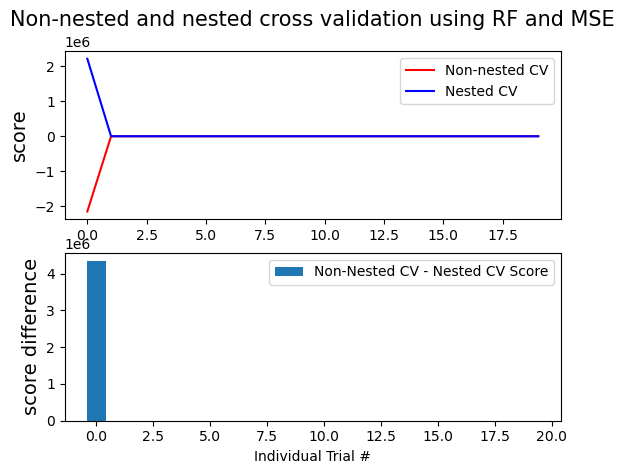

In [77]:
## Results RF Regressor

myfig=plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(mnsqrerr_one_cv_layer, color='r')
nested_line, =plt.plot(mnsqrerr_two_cv_layers, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-nested CV", "Nested CV"],
            #bbox_to_anchor=(0, .4, .5, 0),
            loc=0)
plt.title("Non-nested and nested cross validation using RF and MSE",
          x=.5, y=1.1, fontsize="15")
plt.subplot(212)
difference_plot=plt.bar(range(NoTrials), score_difference[:,0])
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           #bbox_to_anchor=(0,1,.8,0)
            loc=0)
plt.ylabel("score difference", fontsize="14")
plt.show()

## MLP with MSE as metric

In [80]:
# MLP with MSE

from sklearn.neural_network import MLPRegressor

NoTrials= 1

mnsqrerr_one_cv_layer=np.zeros((NoTrials, 1))
mnsqrerr_two_cv_layers=np.zeros((NoTrials, 1))
p_grid ={"alpha": [0.01, 0.008, 0.005, 0.003, 0.001, 0.0008, 0.0005, 0.0003, 0.0001]}
all_opt_alpha=[]
all_preds=np.zeros((len(y_train), NoTrials))
for i in range(0,NoTrials):
    print("Sim: {0}".format(i))
    # generate a new random split of the data
    inner_cv = KFold(n_splits=nfolds, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=nfolds, shuffle=True, random_state=i)
    
    # define the model
    cvmlp=GSCV(MLPRegressor(hidden_layer_sizes=10, 
    activation="logistic", 
    solver="lbfgs", 
    random_state=1, 
    max_iter=500), 
    cv=inner_cv, 
    param_grid=p_grid, 
    n_jobs=-1, 
    scoring=gcv_scorer)
    
    # fit the model
    cvmlp.fit(X=X_train, y=y_train)
    all_opt_alpha.append(cvmlp.cv_results_['param_alpha'][cvmlp.best_index_])

    mnsqrerr_one_cv_layer[i] = cvmlp.best_score_
    ynl_hat=cvp(cvmlp, X=X_train, y=y_train, cv=outer_cv, n_jobs=8)
    all_preds[:,i]=ynl_hat #[:,0]
    mnsqrerr_two_cv_layers[i] = -mean_squared_error(y, ynl_hat)

score_difference = mnsqrerr_two_cv_layers - mnsqrerr_one_cv_layer
params = cvmlp.get_params()
all_opt_alpha

params

Sim: 0


# Quality Control

In this section the goal is to document the packages which where used during the execution of this notebook

In [ ]:
## Package informations

from sklearn import show_versions
show_versions